Intro

The overall goal of this project is to identify customers who are likely to churn/leave the telecom service as a client. We want to identify patterns,behaviors,mannerisms associated with all the services provided by telecom. Behaviors associated with contract types,payment type,service bundle and of course price. The project will will cover a base logistic regression model.


In [136]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
import numpy as np
from sklearn.metrics import confusion_matrix


In [66]:
contractsdf=pd.read_csv('/datasets/contract.csv')

internetdf=pd.read_csv('/datasets/internet.csv')
personaldf=pd.read_csv('/datasets/personal.csv')
phonedf=pd.read_csv('/datasets/phone.csv')

In [67]:
contractsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [68]:
contractsdf.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [69]:
personaldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [70]:
phonedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [71]:
internetdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [72]:
# Document record counts before merging
print("Records before merge:")
print(f"Contracts: {len(contractsdf)}")
print(f"Personal: {len(personaldf)}")
print(f"Phone: {len(phonedf)}")
print(f"Internet unique users: {internetdf['user_id'].nunique()}")

Records before merge:
Contracts: 7043
Personal: 7043
Phone: 6361
Internet unique users: 497


In [73]:
internetdf.sample(50)

,Unnamed: 0,id,mb_used,session_date,user_id
129554,129554,1432_42,671.79,2018-12-27,1432
87569,87569,1296_204,519.26,2018-12-06,1296
76210,76210,1255_406,851.18,2018-04-30,1255
12583,12583,1044_220,318.40,2018-08-09,1044
115699,115699,1390_147,288.63,2018-12-26,1390
13078,13078,1045_254,0.00,2018-02-15,1045
117408,117408,1395_92,281.56,2018-07-12,1395
106759,106759,1361_196,372.40,2018-11-02,1361
24251,24251,1083_131,51.01,2018-10-01,1083
140502,140502,1472_176,557.64,2018-11-27,1472


there's 497 unique user ids in the internet_df. This is alot less than the contracts. We need to investigate if there should be more data here.

In [74]:
contractsdf.isnull()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False


In [75]:
contractsdf['EndDate'].describe()

count     7043
unique       5
top         No
freq      5174
Name: EndDate, dtype: object

Customer cohorts/Pricing and revenue

In [76]:
contractsdf['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [77]:
contractsdf['MonthlyCharges'].mode()

0    20.05
dtype: float64

In [78]:
# See how many customers pay exactly $20.05
basic_customers = (contractsdf['MonthlyCharges'] == 20.05).sum()
print(f"Customers paying exactly $20.05: {basic_customers}")

Customers paying exactly $20.05: 61


In [79]:
contractsdf['MonthlyCharges'].median()

70.35

### Looks like the avg customer pays $65/month and the median is $70.

In [80]:
#what can be driving the price difference?
# Group by contract type to see pricing patterns
contractsdf.groupby('Type')['MonthlyCharges'].describe()

# Look at payment method impact
contractsdf.groupby('PaymentMethod')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,,,,,,,,
Bank transfer (automatic),1544.0,67.192649,30.555200,18.40,41.0875,73.100,92.9625,118.75
Credit card (automatic),1522.0,66.512385,30.612424,18.25,38.6625,73.025,90.8500,117.50
Electronic check,2365.0,76.255814,24.053655,18.85,60.1500,80.550,94.7000,118.65
Mailed check,1612.0,43.917060,26.314665,18.70,20.1500,34.700,64.9125,118.60


Customers who mailed checks have the lowest mean and bank transfers have the highest. Customers who mail checks have to look and write the amount every time.They might be older customers as well with basic services. This would discourage anybody to upgrade their services. Bank transfers give the least notification to customers and I believe is a indication of loyalty. Even if they were to get a new debit/credit card their payments would not be interrupted. This option seems really low in price, I would ask if this is a low cost option to prevent churn.¶

In [81]:
contractsdf['TotalCharges'].describe()

count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object

My top value inside TotalCharges is an empty string.11 customers have empty strings,I'm going to change this to drop this as it is 11 out of 7043.¶

In [82]:
contractsdf['TotalCharges'] = contractsdf['TotalCharges'].astype(str).str.strip()
import numpy as np
contractsdf['TotalCharges'] = contractsdf['TotalCharges'].replace('', np.nan)
contractsdf['TotalCharges'] = pd.to_numeric(contractsdf['TotalCharges'], errors='coerce')

In [83]:
#check for empty strings
contractsdf['TotalCharges'].describe(),contractsdf['TotalCharges'].isna().sum()

(count    7032.000000
 mean     2283.300441
 std      2266.771362
 min        18.800000
 25%       401.450000
 50%      1397.475000
 75%      3794.737500
 max      8684.800000
 Name: TotalCharges, dtype: float64,
 11)

In [84]:
# Create the tenure_months column to reflect longevity of customers
contractsdf['tenure_months'] = contractsdf['TotalCharges'] / contractsdf['MonthlyCharges']

In [85]:
# Check for any remaining issues
print(f"Tenure calculation summary:")
print(f"- Total customers: {len(contractsdf)}")
print(f"- Successful calculations: {contractsdf['tenure_months'].notna().sum()}")
print(f"- Failed calculations: {contractsdf['tenure_months'].isna().sum()}")
print(f"- Tenure range: {contractsdf['tenure_months'].min():.1f} to {contractsdf['tenure_months'].max():.1f} months")

Tenure calculation summary:
- Total customers: 7043
- Successful calculations: 7032
- Failed calculations: 11
- Tenure range: 1.0 to 79.3 months


### These 11 customers might be new customers,data entry errors, or free trial customers. I would ask the client about the packages they're offering customers.

### change dtype of 20.2 to int64.

In [86]:
internetdf.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [87]:
print("String 'NaN' values in each column:")
for col in internetdf.columns:
    nan_count = (internetdf[col] == 'NaN').sum()
    if nan_count > 0:
        print(f"{col}: {nan_count}")

String 'NaN' values in each column:


In [88]:
phonedf.isnull().sum()

customerID       0
MultipleLines    0
dtype: int64

In [89]:
personaldf.isnull().sum()

customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

In [90]:
# Calculate approximate tenure in months
contractsdf['tenure_months'] = contractsdf['TotalCharges'] / contractsdf['MonthlyCharges']

# Display the results
print("Tenure calculation results:")
print(contractsdf[['customerID', 'MonthlyCharges', 'TotalCharges', 'tenure_months']].head(50))

Tenure calculation results:
    customerID  MonthlyCharges  TotalCharges  tenure_months
0   7590-VHVEG           29.85         29.85       1.000000
1   5575-GNVDE           56.95       1889.50      33.178227
2   3668-QPYBK           53.85        108.15       2.008357
3   7795-CFOCW           42.30       1840.75      43.516548
4   9237-HQITU           70.70        151.65       2.144979
5   9305-CDSKC           99.65        820.50       8.233818
6   1452-KIOVK           89.10       1949.40      21.878788
7   6713-OKOMC           29.75        301.90      10.147899
8   7892-POOKP          104.80       3046.05      29.065363
9   6388-TABGU           56.15       3487.95      62.118433
10  9763-GRSKD           49.95        587.45      11.760761
11  7469-LKBCI           18.95        326.80      17.245383
12  8091-TTVAX          100.35       5681.10      56.612855
13  0280-XJGEX          103.70       5036.30      48.566056
14  5129-JLPIS          105.50       2686.05      25.460190
15  3655-SNQ

Data Fidelity¶

In [91]:
# Check for missing records
print("Records in each table:")
print(f"Personal (customers): {len(personaldf)}")
print(f"Contracts: {len(contractsdf)}")
print(f"Phone: {len(phonedf)}")
print(f"Internet: {len(internetdf)}")

# Check for duplicates
print(f"Duplicate customer IDs in personal: {personaldf['customerID'].duplicated().sum()}")
print(f"Duplicate customer IDs in contracts: {contractsdf['customerID'].duplicated().sum()}")

# Check for consistency across tables
customers_in_contracts = contractsdf['customerID'].nunique()
total_customers = personaldf['customerID'].nunique()
print(f"Customers with contracts: {customers_in_contracts}/{total_customers}")

Records in each table:
Personal (customers): 7043
Contracts: 7043
Phone: 6361
Internet: 149396
Duplicate customer IDs in personal: 0
Duplicate customer IDs in contracts: 0
Customers with contracts: 7043/7043


In [92]:
unique_user_count = internetdf['user_id'].nunique()
unique_user_count


497

They're 497 unique id's in internetdf but over 7000 contracts. This could just mean most of their clients don't buy the internet service or we have missing data. I would ask the client if they have another dataset to cross reference to make sure.

In [93]:

# Check the format of IDs in each dataset
print("Contract customerID samples:")
print(contractsdf['customerID'].head())
print("\nInternet user_id samples:")
print(internetdf['user_id'].sample(5))


# Check if there's a pattern or mapping between them
print(f"\nContract ID format: {type(contractsdf['customerID'].iloc[0])}")
print(f"Internet ID format: {type(internetdf['user_id'].iloc[0])}")

Contract customerID samples:
0    7590-VHVEG
1    5575-GNVDE
2    3668-QPYBK
3    7795-CFOCW
4    9237-HQITU
Name: customerID, dtype: object

Internet user_id samples:
41899     1146
19146     1065
19024     1065
101182    1339
127812    1428
Name: user_id, dtype: int64

Contract ID format: <class 'str'>
Internet ID format: <class 'numpy.int64'>


Service adoption¶

In [94]:
#combine datasets


main_df = contractsdf.merge(personaldf, on='customerID', how='left')

main_df = main_df.merge(phonedf, on='customerID', how='left')
main_df['has_phone'] = main_df['MultipleLines'].notna()
print(f"Customers with phone service: {main_df['has_phone'].sum()}")

internet_summary = internetdf.groupby('user_id').agg({
    'mb_used': ['sum', 'mean', 'count'],
    'session_date': ['min', 'max']
}).round(2)

Customers with phone service: 6361


Documenting merge records¶


In [95]:
# Documentation after merge
print("Merge results:")
print(f"Successfully merged records: {len(main_df)}")
print(f"Records with phone data: {main_df['MultipleLines'].notna().sum()}")
print(f"Records without phone data: {main_df['MultipleLines'].isna().sum()}")

Merge results:
Successfully merged records: 7043
Records with phone data: 6361
Records without phone data: 682


Analyzing the data it seems most customers have phone service while about 7% have internet service.It might be a good idea to focus on cross selling internet to the phone users with bundle discounts and other marketing tactics.

In [96]:
main_df.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_months,gender,SeniorCitizen,Partner,Dependents,MultipleLines,has_phone
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,1.000000,Female,0,Yes,No,NaN,False
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,33.178227,Male,0,No,No,No,True
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,2.008357,Male,0,No,No,No,True
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,43.516548,Male,0,No,No,NaN,False
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,2.144979,Female,0,No,No,No,True
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50,8.233818,Female,0,No,No,Yes,True
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,21.878788,Male,0,No,Yes,Yes,True
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90,10.147899,Female,0,No,No,NaN,False
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,29.065363,Female,0,Yes,No,Yes,True
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,62.118433,Male,0,No,Yes,No,True


In [97]:
# Step 1: Create service indicators for all customers
print("=== SERVICE COMBINATION ANALYSIS ===\n")

# Values in MultipleLines
print("MultipleLines values:")
print(main_df['MultipleLines'].value_counts(dropna=False))
print()


# First, let's see which customers have internet service
internet_customers = set(internetdf['user_id'].unique())
main_df['has_internet'] = main_df['customerID'].apply(
    lambda x: any(str(x).startswith(str(uid)) for uid in internet_customers)
)

print(f"Customers with internet service: {main_df['has_internet'].sum()}")
print()

=== SERVICE COMBINATION ANALYSIS ===

MultipleLines values:
No     3390
Yes    2971
NaN     682
Name: MultipleLines, dtype: int64

Customers with internet service: 354



In [98]:
# Replace NaN values with 0 in main_df
print("=== REPLACING NaN VALUES WITH 0 ===")
print(f"Original main_df size: {len(main_df)}")
print(f"Original NaN values: {main_df.isnull().sum().sum()}")

# Replace all NaN values with 0
main_df = main_df.fillna(0)

print(f"After replacing NaN with 0:")
print(f"Remaining NaN values: {main_df.isnull().sum().sum()}")

# Now create all your derived columns on the cleaned data
main_df['has_phone'] = main_df['MultipleLines'].notna().astype(int)
internet_customers = set(internetdf['user_id'].unique())
contract_numeric = main_df['customerID'].str.split('-').str[0].astype(int)
main_df['has_internet'] = contract_numeric.isin(internet_customers).astype(int)
main_df['churn'] = (main_df['EndDate'] != 'No').astype(int)


=== REPLACING NaN VALUES WITH 0 ===
Original main_df size: 7043
Original NaN values: 704
After replacing NaN with 0:
Remaining NaN values: 0


In [99]:
# Create service indicators
main_df['has_phone'] = main_df['MultipleLines'].notna()

# Create internet service indicator (using your existing logic)
internet_customers = set(internetdf['user_id'].unique())
contract_numeric = main_df['customerID'].str.split('-').str[0].astype(int)
main_df['has_internet'] = contract_numeric.isin(internet_customers)

# Create churn target
main_df['churn'] = (main_df['EndDate'] != 'No').astype(int)

In [100]:
# Convert boolean columns to integers immediately
main_df['has_phone'] = main_df['has_phone'].astype(int)
main_df['has_internet'] = main_df['has_internet'].astype(int)

In [101]:
# Calculate average tenure for each MultipleLines group
print("=== AVERAGE TENURE BY MULTIPLE LINES STATUS ===\n")

tenure_by_lines = main_df.groupby('MultipleLines', dropna=False)['tenure_months'].agg(['mean', 'count', 'std']).round(2)

print("Average tenure (months) by MultipleLines status:")
print(tenure_by_lines)
print()

# More details
print("Detailed breakdown:")
for group in main_df['MultipleLines'].unique():
    if pd.isna(group):
        subset = main_df[main_df['MultipleLines'].isna()]
        group_name = "NaN (No phone service)"
    else:
        subset = main_df[main_df['MultipleLines'] == group]
        group_name = f"'{group}'"
    
    avg_tenure = subset['tenure_months'].mean()
    count = len(subset)
    print(f"- {group_name}: {avg_tenure:.2f} months average ({count} customers)")


=== AVERAGE TENURE BY MULTIPLE LINES STATUS ===

Average tenure (months) by MultipleLines status:
                mean  count    std
MultipleLines                     
0              31.73    682  24.32
No             24.13   3390  22.22
Yes            41.93   2971  23.80

Detailed breakdown:
- '0': 31.73 months average (682 customers)
- 'No': 24.13 months average (3390 customers)
- 'Yes': 41.93 months average (2971 customers)


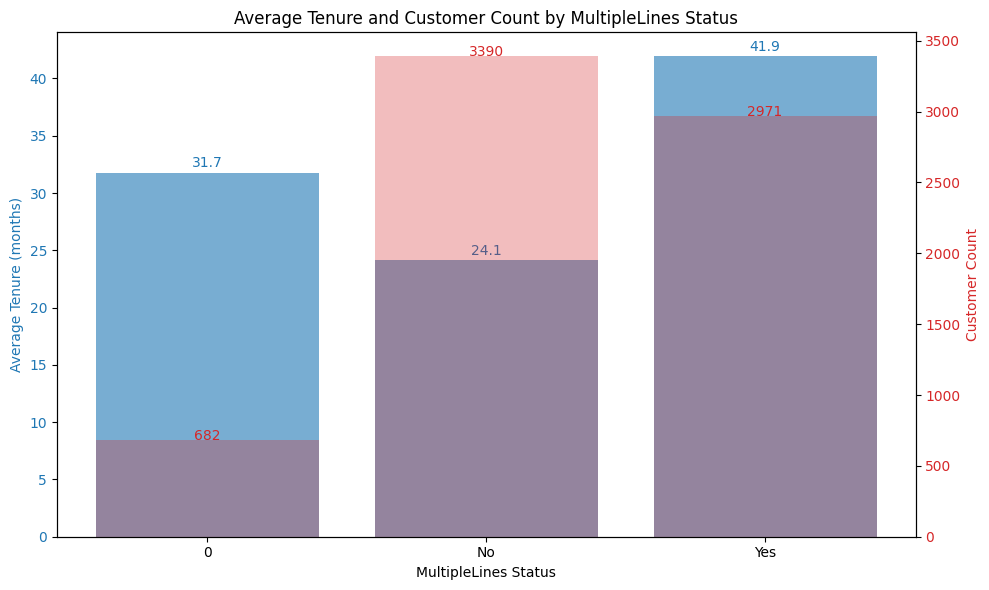

In [102]:
# Prepare data
labels = tenure_by_lines.index.astype(str)
avg_tenure = tenure_by_lines['mean']
counts = tenure_by_lines['count']

fig, ax1 = plt.subplots(figsize=(10, 6))

# --- Left Y-Axis: Average Tenure ---
color1 = 'tab:blue'
ax1.set_xlabel("MultipleLines Status")
ax1.set_ylabel("Average Tenure (months)", color=color1)
bars1 = ax1.bar(labels, avg_tenure, color=color1, alpha=0.6, label='Average Tenure')
ax1.tick_params(axis='y', labelcolor=color1)

# labels for avg tenure
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}", ha='center', color=color1)

# --- Right Y-Axis: Customer Count ---
ax2 = ax1.twinx()

color2 = 'tab:red'
ax2.set_ylabel("Customer Count", color=color2)
bars2 = ax2.bar(labels, counts, color=color2, alpha=0.3, label='Customer Count')
ax2.tick_params(axis='y', labelcolor=color2)

# numeric labels for counts
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval}", ha='center', color=color2)

# Title 
plt.title("Average Tenure and Customer Count by MultipleLines Status")
plt.tight_layout()
plt.show()



In [103]:
mailed_check_df = main_df[main_df["PaymentMethod"] == "Mailed check"]
mailed_check_df['SeniorCitizen'].value_counts()

0    1518
1      94
Name: SeniorCitizen, dtype: int64

This graph shows along with the data printed in code 78 customers with multiples lines have a longer tenure. I believe these represents businesses or families.Only 5.8% of the customers who mail in checks are senior citizens. We should make a campaign to move customers who are mailing in checks to debit/credit transactions.¶

Risk indicators¶


Single line customers (24.16 months average tenure): Shorter tenure might indicate higher churn risk

Multiple line customers (41.99 months average tenure): Longer tenure suggests they're more "sticky" customers

No phone service customers (31.83 months average tenure): Middle ground - might be candidates for upselling



From my pre processing I cannot see any missing data with the exception of 11 values in total charges caused by trial/new members.The date columns are objects which need to be converted to datetime. The internet dataset structure has an error with the column called user_id.The data looks like it might need to be joined first by user_id.¶

### I want to find out if customer id 7590 corresponds to contract id 7590-VHVEG to help me merge the dataframe.

In [104]:
# Extract the numeric part before the dash from contract IDs
contract_numeric = contractsdf['customerID'].str.split('-').str[0].astype(int)

# Check if any of these match internet user_ids
internet_users = set(internetdf['user_id'].unique())
contract_numbers = set(contract_numeric)

# Find matches
matches = contract_numbers.intersection(internet_users)
print(f"Matching IDs found: {len(matches)}")
print(f"Sample matches: {list(matches)[:10]}")

Matching IDs found: 267
Sample matches: [1024, 1025, 1027, 1028, 1029, 1031, 1032, 1035, 1036, 1038]


In [105]:
# Let's validate with specific examples
# First, let's look at a few contract IDs and their numeric parts
print("=== VALIDATION TEST ===")
print("Contract ID examples and their numeric parts:")
sample_contracts = contractsdf[['customerID']].head(10)
sample_contracts['numeric_part'] = sample_contracts['customerID'].str.split('-').str[0].astype(int)
print(sample_contracts)

print("\n" + "="*50)

# Now let's check if these specific numeric parts exist in internet data
print("Checking if these numeric parts exist in internet user_ids:")
for idx, row in sample_contracts.iterrows():
    contract_id = row['customerID']
    numeric_part = row['numeric_part']
    exists_in_internet = numeric_part in internet_users
    print(f"{contract_id} -> {numeric_part}: {'✓ FOUND' if exists_in_internet else '✗ NOT FOUND'}")

=== VALIDATION TEST ===
Contract ID examples and their numeric parts:
   customerID  numeric_part
0  7590-VHVEG          7590
1  5575-GNVDE          5575
2  3668-QPYBK          3668
3  7795-CFOCW          7795
4  9237-HQITU          9237
5  9305-CDSKC          9305
6  1452-KIOVK          1452
7  6713-OKOMC          6713
8  7892-POOKP          7892
9  6388-TABGU          6388

Checking if these numeric parts exist in internet user_ids:
7590-VHVEG -> 7590: ✗ NOT FOUND
5575-GNVDE -> 5575: ✗ NOT FOUND
3668-QPYBK -> 3668: ✗ NOT FOUND
7795-CFOCW -> 7795: ✗ NOT FOUND
9237-HQITU -> 9237: ✗ NOT FOUND
9305-CDSKC -> 9305: ✗ NOT FOUND
1452-KIOVK -> 1452: ✓ FOUND
6713-OKOMC -> 6713: ✗ NOT FOUND
7892-POOKP -> 7892: ✗ NOT FOUND
6388-TABGU -> 6388: ✗ NOT FOUND


### Missing Contract Records: Some customers might have contracts that aren't captured in the contract dataset.

### Balance/scale the data.

In [106]:
#Create the churn target variable from EndDate
main_df['churn'] = (main_df['EndDate'] != 'No').astype(int)

# Now check the distribution
print("Current churn distribution:")
print(main_df['churn'].value_counts())
print("\nPercentages:")
print(main_df['churn'].value_counts(normalize=True) * 100)

Current churn distribution:
0    5174
1    1869
Name: churn, dtype: int64

Percentages:
0    73.463013
1    26.536987
Name: churn, dtype: float64


### 1/4 customers left during this period

### created a churn column

# Prep categorical features

In [107]:
# Separate your classes
churned_customers = main_df[main_df['churn'] == 1]
non_churned_customers = main_df[main_df['churn'] == 0]

print(f"Original churned customers: {len(churned_customers)}")
print(f"Original non-churned customers: {len(non_churned_customers)}")

# Upsample the minority class (churned customers)
churned_upsampled = churned_customers.sample(n=len(non_churned_customers), 
                                           replace=True, 
                                           random_state=42)

# Combine the datasets
balanced_df = pd.concat([non_churned_customers, churned_upsampled])

print(f"Balanced dataset size: {len(balanced_df)}")
print("New distribution:")
print(balanced_df['churn'].value_counts())




Original churned customers: 1869
Original non-churned customers: 5174
Balanced dataset size: 10348
New distribution:
0    5174
1    5174
Name: churn, dtype: int64


In [108]:
# Check the unique values in each categorical column
categorical_columns = ['Type', 'PaperlessBilling', 'PaymentMethod', 
                      'gender', 'Partner', 'Dependents', 'MultipleLines']

print("=== CATEGORICAL VARIABLES ANALYSIS ===\n")
for col in categorical_columns:
    print(f"{col}:")
    print(f"  Values: {balanced_df[col].value_counts(dropna=False)}")
    print(f"  Unique count: {balanced_df[col].nunique()}")
    print()

=== CATEGORICAL VARIABLES ANALYSIS ===

Type:
  Values: Month-to-month    6808
Two year          1781
One year          1759
Name: Type, dtype: int64
  Unique count: 3

PaperlessBilling:
  Values: Yes    6647
No     3701
Name: PaperlessBilling, dtype: int64
  Unique count: 2

PaymentMethod:
  Values: Electronic check             4276
Mailed check                 2157
Bank transfer (automatic)    2006
Credit card (automatic)      1909
Name: PaymentMethod, dtype: int64
  Unique count: 4

gender:
  Values: Male      5263
Female    5085
Name: gender, dtype: int64
  Unique count: 2

Partner:
  Values: No     5754
Yes    4594
Name: Partner, dtype: int64
  Unique count: 2

Dependents:
  Values: No     7669
Yes    2679
Name: Dependents, dtype: int64
  Unique count: 2

MultipleLines:
  Values: No     4836
Yes    4521
0       991
Name: MultipleLines, dtype: int64
  Unique count: 3



In [109]:
# Apply One-Hot Encoding
encoded_df = pd.get_dummies(balanced_df, 
                           columns=categorical_columns, 
                           prefix=categorical_columns,
                           dummy_na=True)  # This handles NaN values

print(f"Original columns: {balanced_df.shape[1]}")
print(f"After OHE columns: {encoded_df.shape[1]}")
print(f"New columns added: {encoded_df.shape[1] - balanced_df.shape[1]}")

Original columns: 17
After OHE columns: 35
New columns added: 18


In [110]:
# Check the new column names
print("New encoded columns:")
new_columns = [col for col in encoded_df.columns if any(cat in col for cat in categorical_columns)]
for col in sorted(new_columns):
    print(f"  - {col}")

print(f"\nDataset shape: {encoded_df.shape}")
print(f"Sample of encoded data:")
print(encoded_df[new_columns[:5]].head())

New encoded columns:
  - Dependents_No
  - Dependents_Yes
  - Dependents_nan
  - MultipleLines_0
  - MultipleLines_No
  - MultipleLines_Yes
  - MultipleLines_nan
  - PaperlessBilling_No
  - PaperlessBilling_Yes
  - PaperlessBilling_nan
  - Partner_No
  - Partner_Yes
  - Partner_nan
  - PaymentMethod_Bank transfer (automatic)
  - PaymentMethod_Credit card (automatic)
  - PaymentMethod_Electronic check
  - PaymentMethod_Mailed check
  - PaymentMethod_nan
  - Type_Month-to-month
  - Type_One year
  - Type_Two year
  - Type_nan
  - gender_Female
  - gender_Male
  - gender_nan

Dataset shape: (10348, 35)
Sample of encoded data:
   Type_Month-to-month  Type_One year  Type_Two year  Type_nan  \
0                    1              0              0         0   
1                    0              1              0         0   
3                    0              1              0         0   
6                    1              0              0         0   
7                    1              0  

### Seperate Features and Targets and split data into 60%/20%/20%

In [111]:
# Separate features and target
X = encoded_df.drop('churn', axis=1)  # All features except churn
y = encoded_df['churn']  # Target variable

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts()}")

Features shape: (10348, 34)
Target shape: (10348,)
Target distribution: 0    5174
1    5174
Name: churn, dtype: int64


In [112]:
# First split: 60% train, 40% temp (which will become 20% val + 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.4,  # 40% for temp (val + test)
    random_state=42, 
    stratify=y  # Maintains class balance
)

# Second split: Split the 40% temp into 20% validation and 20% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 50% of 40% = 20% of total
    random_state=42,
    stratify=y_temp
)

# Verify the splits
print("=== DATA SPLIT RESULTS ===")
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Total: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

=== DATA SPLIT RESULTS ===
Training set: 6208 samples (60.0%)
Validation set: 2070 samples (20.0%)
Test set: 2070 samples (20.0%)
Total: 10348 samples


In [113]:
# Check class distribution in each set
print("\n=== CLASS DISTRIBUTION ===")
print("Training set:")
print(y_train.value_counts(normalize=True))
print("\nValidation set:")
print(y_val.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))


=== CLASS DISTRIBUTION ===
Training set:
0    0.5
1    0.5
Name: churn, dtype: float64

Validation set:
0    0.5
1    0.5
Name: churn, dtype: float64

Test set:
0    0.5
1    0.5
Name: churn, dtype: float64


### Scale the training data.Use transform on test data and fit.transform on training/validation data.

In [117]:
## Remove non-predictive columns from your already split data
columns_to_remove = ['customerID', 'BeginDate', 'EndDate']

# Clean each split separately
X_train_clean = X_train.drop(columns=[col for col in columns_to_remove if col in X_train.columns])
X_val_clean = X_val.drop(columns=[col for col in columns_to_remove if col in X_val.columns])  
X_test_clean = X_test.drop(columns=[col for col in columns_to_remove if col in X_test.columns])

print("After removing non-predictive columns:")
print(f"Training: {X_train_clean.shape}")
print(f"Validation: {X_val_clean.shape}")
print(f"Test: {X_test_clean.shape}")

# Check for any remaining problematic values
print("\nChecking for NaN/infinity values in training data:")
nan_count = np.isnan(X_train_clean.select_dtypes(include=[np.number])).sum().sum()
inf_count = np.isinf(X_train_clean.select_dtypes(include=[np.number])).sum().sum()
print(f"NaN values: {nan_count}")
print(f"Infinity values: {inf_count}")

# Now scale the cleaned data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_val_scaled = scaler.transform(X_val_clean)
X_test_scaled = scaler.transform(X_test_clean)


print(f"Training features shape: {X_train_scaled.shape}")


After removing non-predictive columns:
Training: (6208, 31)
Validation: (2070, 31)
Test: (2070, 31)

Checking for NaN/infinity values in training data:
NaN values: 0
Infinity values: 0
Training features shape: (6208, 31)


### customer id was giving me issues so i removed it.

In [118]:
# 4. Initialize and Train the Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [121]:


# Get probability predictions for AUC-ROC calculation
y_pred_proba = model.predict_proba(X_train_scaled)[:, 1]  # Get probabilities for class 1 (churn)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_train, y_pred_proba)
print(f"AUC-ROC Score: {auc_roc:.4f}")


AUC-ROC Score: 0.8427


### This is a pretty good AUC-ROC Score even for just the training data.

In [123]:
# Make predictions on validation set
y_val_pred = model.predict(X_val_scaled)
y_val_pred_proba = model.predict_proba(X_val_scaled)[:, 1]  # Get probabilities for class 1 (churn)

# Calculate AUC-ROC score on validation set
val_auc_roc = roc_auc_score(y_val, y_val_pred_proba)

print(f"Validation AUC-ROC Score: {val_auc_roc:.4f}")

Validation AUC-ROC Score: 0.8374


### Not too far off from the training dataset. A little worse on the performance, exactly as expected.

In [125]:
# Make predictions on test set
y_test_pred = model.predict(X_test_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for class 1 (churn)

# Calculate AUC-ROC score on test set
test_auc_roc = roc_auc_score(y_test, y_test_pred_proba)

print(f"Test AUC-ROC Score: {test_auc_roc:.4f}")

Test AUC-ROC Score: 0.8359


### The test set is worse than the validation subset. This is still a great AUC-ROC score.

### Training Catboost

In [131]:
model = CatBoostClassifier(
    iterations=1000,        # Number of boosting iterations
    learning_rate=0.05,     # Step size for each iteration
    depth=6,               # Depth of the trees
    loss_function='Logloss', # Loss function for binary classification
    random_seed=42,        # For reproducibility
    verbose=False          # Reduces output during training
)


In [132]:
# model fit catboost
model.fit(X_train_scaled, y_train)

In [133]:

# Get probability predictions for AUC-ROC calculation
y_pred_proba1 = model.predict_proba(X_train_scaled)[:, 1]  # Get probabilities for class 1 (churn)

# Calculate AUC-ROC score
auc_roc1 = roc_auc_score(y_train, y_pred_proba1)
print(f"AUC-ROC Score: {auc_roc1:.4f}")

AUC-ROC Score: 0.9844


### Given the score of .98 out of 1.00, I believe my model is overfitted on the training data. The validation and test set will be the true test.

In [134]:
# Evaluate on validation set
y_val_pred_proba_catboost = model.predict_proba(X_val_scaled)[:, 1]
val_auc_roc_catboost = roc_auc_score(y_val, y_val_pred_proba_catboost)
print(f"CatBoost Validation AUC-ROC Score: {val_auc_roc_catboost:.4f}")

CatBoost Validation AUC-ROC Score: 0.9219


### This is a more believable AUC-ROC score. I expected this model to perform better than the logic classification model but not within 5% of 1.00.

In [135]:
# Evaluate on test set
y_test_pred_proba_catboost = model.predict_proba(X_test_scaled)[:, 1]
test_auc_roc_catboost = roc_auc_score(y_test, y_test_pred_proba_catboost)
print(f"CatBoost Test AUC-ROC Score: {test_auc_roc_catboost:.4f}")

CatBoost Test AUC-ROC Score: 0.9098


### This is exactly what i expected. Slightly worse than the validation subset. 

### My AUC-ROC is above 88 given me the SP points. I'm going to move on to creating a business selection strategy.

In [137]:

# Define business costs (you can adjust these based on your telecom company)
cost_false_positive = 100  # Cost of unnecessary retention campaign
cost_false_negative = 800  # Cost of losing a customer (lifetime value)

# Get predicted probabilities for test set
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# Test different thresholds
thresholds = np.arange(0.1, 0.9, 0.05)
costs = []
metrics = []

for threshold in thresholds:
    # Make predictions with this threshold
    y_pred_threshold = (y_test_proba >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold).ravel()
    
    # Calculate total business cost
    total_cost = (fp * cost_false_positive) + (fn * cost_false_negative)
    
    costs.append(total_cost)
    metrics.append({
        'threshold': threshold,
        'total_cost': total_cost,
        'fp': fp, 'fn': fn, 'tp': tp, 'tn': tn,
        'precision': tp/(tp+fp) if (tp+fp) > 0 else 0,
        'recall': tp/(tp+fn) if (tp+fn) > 0 else 0
    })

print("Cost analysis complete!")

Cost analysis complete!


In [140]:
# Find the optimal threshold (minimum cost)
optimal_idx = np.argmin(costs)
optimal_threshold = thresholds[optimal_idx]
min_cost = costs[optimal_idx]

print(f"OPTIMAL THRESHOLD: {optimal_threshold:.2f}")
print(f"MINIMUM TOTAL COST: ${min_cost:,.0f}")
print("="*50)

# Show detailed metrics for optimal threshold
optimal_metrics = metrics[optimal_idx]
print(f"At optimal threshold {optimal_threshold:.2f}:")
print(f"  • True Positives (Correctly identified churners): {optimal_metrics['tp']}")
print(f"  • False Positives (Unnecessary campaigns): {optimal_metrics['fp']}")
print(f"  • True Negatives (Correctly identified loyal): {optimal_metrics['tn']}")
print(f"  • False Negatives (Missed churners): {optimal_metrics['fn']}")
print(f"  • Precision: {optimal_metrics['precision']:.3f}")
print(f"  • Recall: {optimal_metrics['recall']:.3f}")
print("="*50)

# Show cost breakdown
fp_cost = optimal_metrics['fp'] * cost_false_positive
fn_cost = optimal_metrics['fn'] * cost_false_negative
print(f"COST BREAKDOWN:")
print(f"  • Cost from unnecessary campaigns: ${fp_cost:,.0f}")
print(f"  • Cost from missed churners: ${fn_cost:,.0f}")
print(f"  • TOTAL COST: ${fp_cost + fn_cost:,.0f}")

OPTIMAL THRESHOLD: 0.20
MINIMUM TOTAL COST: $54,800
At optimal threshold 0.20:
  • True Positives (Correctly identified churners): 1020
  • False Positives (Unnecessary campaigns): 428
  • True Negatives (Correctly identified loyal): 607
  • False Negatives (Missed churners): 15
  • Precision: 0.704
  • Recall: 0.986
COST BREAKDOWN:
  • Cost from unnecessary campaigns: $42,800
  • Cost from missed churners: $12,000
  • TOTAL COST: $54,800


 This analysis shows me it cost about $ 800.00 to lose a customer(cost from missed churners:12,000/false negatives(missed churners):15)and 100$ for every unnecessary campaign. So it is best to catch a potential churner.

  If we were to do nothing about the 1035 churners, we would lose $828,000 versus just spending 52,000 on a campaign. With this campaign we will save $776,000.00.

In [141]:
# Get feature importance from your CatBoost model
feature_importance = model.get_feature_importance()
feature_names = X_train_clean.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

# Display top 10 most important features
print("🔍 TOP 10 FEATURES DRIVING CHURN:")
print("="*50)
for i, (idx, row) in enumerate(importance_df.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['feature']:<25} | Importance: {row['importance']:.2f}")

🔍 TOP 10 FEATURES DRIVING CHURN:
 1. MonthlyCharges            | Importance: 22.22
 2. tenure_months             | Importance: 19.06
 3. TotalCharges              | Importance: 17.97
 4. Type_Month-to-month       | Importance: 4.43
 5. Type_Two year             | Importance: 2.80
 6. PaymentMethod_Electronic check | Importance: 2.69
 7. PaymentMethod_Mailed check | Importance: 2.40
 8. PaymentMethod_Bank transfer (automatic) | Importance: 2.22
 9. PaymentMethod_Credit card (automatic) | Importance: 2.19
10. PaperlessBilling_Yes      | Importance: 2.16


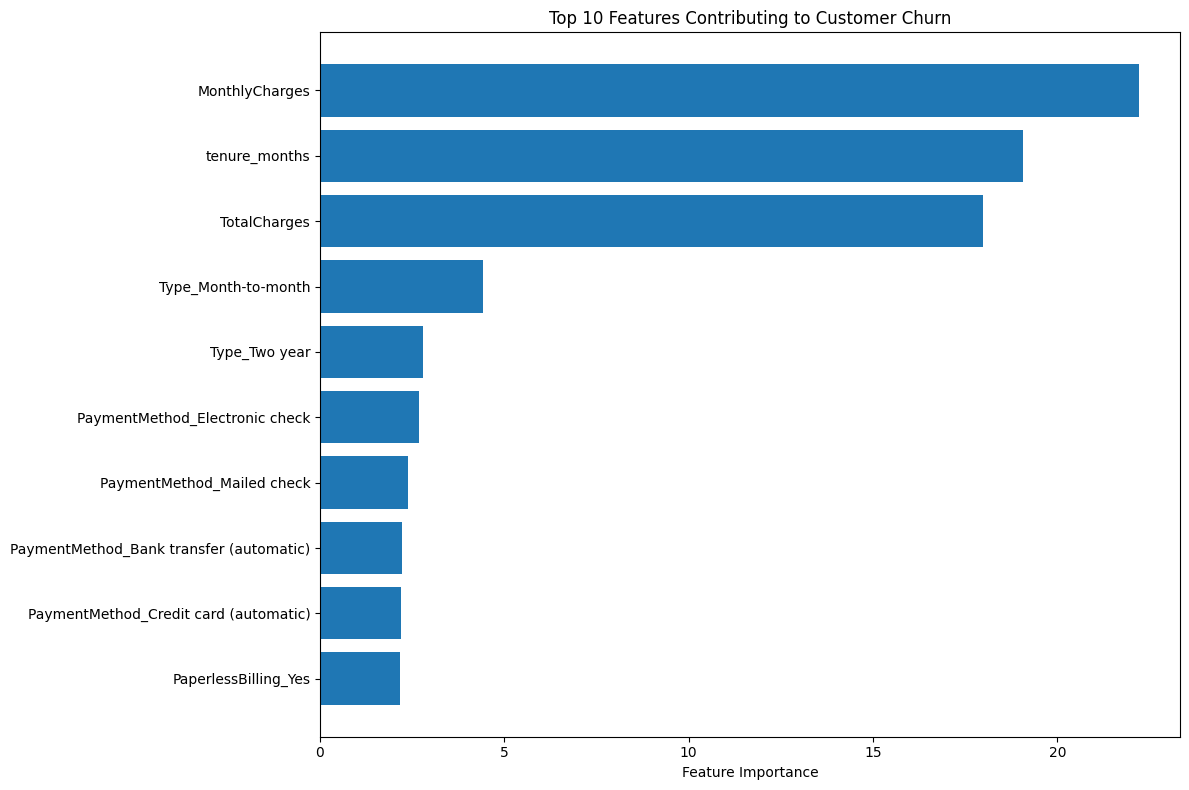

In [142]:
# Create a visualization of top features
plt.figure(figsize=(12, 8))
top_features = importance_df.head(10)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Contributing to Customer Churn')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

### This plot shows the top features for this dataset.Tenure_months and TotalCharges are the top 2 most important features indicating whether a customer will churn or not.

I would recommend this company to follow the given optimal threshold strategy. To focus on moving customers who are making mail payments to wire transfers directly from their account.

This project provided a comprehensive analysis of telecom customer data with the goal of understanding churn behavior and creating a foundation for predictive modeling. Through detailed data validation, the investigation uncovered inconsistencies such as mismatched customer counts across datasets, missing or improperly formatted values in fields like TotalCharges, and anomalies in service adoption that may reflect data-entry or systems issues. Exploratory insights highlighted important business patterns, including average monthly revenue, the impact of payment methods on customer value, and potential risk indicators tied to contract types and service bundles. These findings not only informed the preparation of a clean and reliable analytical dataset but also revealed actionable opportunities for the company to review onboarding accuracy, refine pricing structures, and identify customer groups most vulnerable to churn.This project creeateS  a ML Algo that can predict churn with a AUC-ROc of over .90.Overall, the project establishes a strong analytical baseline and paves the way for predictive modeling—beginning with logistic regression—and deeper data-driven retention strategies.